<h1> Database: [data_schoolofinf](../data_schoolofinf) </h1>

In [1]:
import pandas as pd

# Preprocess `metadata` from Informatics

In this notebook, I aim to detail the methods used for preprocessing the abstract and publications that will be part of the corpus used for topic modelling further down the pipeline.

Building on the dataset from the [preprocess-poinf.ipynb](../../../infnet-scrapper/notebooks/preprocess-poinf.ipynb), we further preprocess the additional details scrapped from Edinburgh research explorer. 

The main focus of [preprocess-poinf.ipynb](../../../infnet-scrapper/notebooks/preprocess-poinf.ipynb) is to preprocess the data collected from Edinburgh Research Explorer for . This notebook, on the other hand, focuses on the publications - the abstracts (if any) and publications/conferences that the research is presented in.

<s>This is a precursor to a full-blown LDA analysis on the PDF of the research (the research papers).</s> Refer to [preprocessing pdf2txt](#Preprocessing-scrapped-PDF)

## `publication.csv` revisited

I analyse the `publication.csv` dataset in this section.

In [2]:
pub_csv = pd.read_csv('../data_schoolofinf/publications.csv')
print(('pub_csv contains:', len(pub_csv), ' publications'))
pub_csv.iloc[40:42]  # sample the data

('pub_csv contains:', 8867, ' publications')


,pub_id,date,year,title,authors,pub_url,doi_url,pdf_url,abstract,publications
40,f4293dd4-09a5-420b-b37a-2bd88d45c6e6,1 Jun 2007,2007,statistical postediting on systrans rulebased ...,loïc dugast|jean senellart|philipp koehn,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,http://www.research.ed.ac.uk/portal/files/1936...,this article describes the combination of a sy...,proceedings of the second workshop on statisti...
41,fc393df2-bf68-45cd-85ce-9faeb2c9d9b4,17 May 2017,2017,endtoend deep learning of optimization heuristics,christopher cummins|pavlos petoumenos|zheng wa...,http://www.research.ed.ac.uk/portal/en/publica...,http://dx.doi.org/10.1109/PACT.2017.24,http://www.research.ed.ac.uk/portal/files/3774...,accurate automatic optimization heuristics are...,the 26th international conference on parallel ...


In [3]:
# Focusing on the publication where
pub_csv.set_index('pub_id', inplace=True)
pub_concise = pub_csv[['year', 'title', 'abstract', 'publications']].copy()

In [4]:
# Remove all entries that are 'UNKNOWN', so that when we combine them into the `summary` column,
# `UNKNOWN` is not a term for consideration
def removeUnknown(x):
    if str(x).strip().lower() == 'unknown':
        return ''
    else:
        return x

In [5]:
pub_concise = pub_concise.applymap(removeUnknown)

In [6]:
# Concatenate all the text together to form as the representation of the publication:
pub_concise['summary'] = pub_concise.apply(
    lambda row: str(row.title) + '. ' + str(row.abstract) + '. '+  str(row.publications),
    axis=1)

In [7]:
pub_concise.iloc[0].summary

'ballooning stability analysis of jet hmode discharges. previous studies of the stability of a large aspect ratio model equilibrium to ideal mhd ballooning modes have shown that across the bulk of the plasma there exist two marginally stable values of the pressure gradient parameter α. these define an unstable zone which separates the first (small α) stable region from the second (large α) stable region. close to the separatrix, however, the first and second regions can coalesce when the surface averaged current density, Λ, exceeds a critical value. the plasma in this region is then stable to ballooning modes at all values of the pressure gradient. in this paper we extend these results to jet h-mode equilibria using a finite aspect ratio ballooning formalism, and assess the relevance of ideal ballooning stability in these discharges. in particular we analyse shot 15894 at time 56 sec. which is 1.3 s into the h-phase..  proceedings 16th european conference on controlled fusion and plasm

## Preprocessing `summary` -> `summary_toks`

<big>THESE FUNCTIONS ARE NOW IN [preprocess.py](./preprocess.py)</big>

In [13]:
# import Stemmer # DOESNT EXISTS IN py36
# import string

# # Common stopwords
# from nltk.corpus import stopwords
# sw = stopwords.words('english')
# sw.extend(list(string.punctuation))
# stop = set(sw)

In [8]:
# # Standard preprocessing:
# # 1. tokenizer: split by word boundary.
# tokenize = lambda x: [t.lower().strip() for t in re.split(r'\W+', x) if len(t) > 0]

# # 2. stopping: import common stopwords
# removeSW = lambda x: [t for t in x if t not in stop]

# # 3: Stemming: using pystemmer
# stemmer = Stemmer.Stemmer("english")
# stem = lambda x: stemmer.stemWords(x)

# preprocess = lambda x: stem(removeSW(tokenize(x)))

In [55]:
# from nltk.tokenize import RegexpTokenizer
# from nltk.stem.wordnet import WordNetLemmatizer

In [64]:
# # tokenizing the sentences; this uses punkt tokenizer
# tokenizer = RegexpTokenizer(r'\w+')
# tokenize = lambda x : tokenizer.tokenize(x)

# # apply stopping, and remove tokens that have length of 1
# removeSW = lambda x : list([t for t in x if t not in stop and len(t) > 1 and not t.isnumeric()])

# # Lemmatizing
# lemmatizer = WordNetLemmatizer()
# lemmify = lambda x : [lemmatizer.lemmatize(t) for t in x]

# preprocess = lambda x: lemmify(removeSW(tokenize(x)))

In [68]:
# sample = pub_concise.iloc[0].summary
# print('Before preprocessing:')
# print(sample)
# print('\nAfter preprocessing:')
# print((" ".join(preprocess(sample))))

Before preprocessing:
ballooning stability analysis of jet hmode discharges. previous studies of the stability of a large aspect ratio model equilibrium to ideal mhd ballooning modes have shown that across the bulk of the plasma there exist two marginally stable values of the pressure gradient parameter α. these define an unstable zone which separates the first (small α) stable region from the second (large α) stable region. close to the separatrix, however, the first and second regions can coalesce when the surface averaged current density, Λ, exceeds a critical value. the plasma in this region is then stable to ballooning modes at all values of the pressure gradient. in this paper we extend these results to jet h-mode equilibria using a finite aspect ratio ballooning formalism, and assess the relevance of ideal ballooning stability in these discharges. in particular we analyse shot 15894 at time 56 sec. which is 1.3 s into the h-phase..  proceedings 16th european conference on contro

In [8]:
# =========== Using the package ==================
from preprocess import preprocess

In [9]:
pub_concise['summary_toks'] = pub_concise['summary'].apply(preprocess)

In [10]:
pub_concise.head(4)

,year,title,abstract,publications,summary,summary_toks
pub_id,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,ballooning stability analysis of jet hmode dis...,"[ballooning, stability, analysis, jet, hmode, ..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",query processing in data integration. in this ...,"[query, processing, data, integration, chapter..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,comprehension syntax,the syntax of comprehensions is very close to ...,sigmod record,comprehension syntax. the syntax of comprehens...,"[comprehension, syntax, syntax, comprehension,..."
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,evaluation of speaker verification security an...,"in this paper, we evaluate the vulnerability o...","ieee transactions on audio, speech and languag...",evaluation of speaker verification security an...,"[evaluation, speaker, verification, security, ..."


## Generate bi-gram and tri-gram

In [11]:
from gensim.models.phrases import Phraser, Phrases

We can use the tokenize and lemmatized corpus to detect bi-grams and tri-grams. This will give additional weights to phrases that collocate

In [12]:
# bigram and trigram are phrases that appear at least 20 times
summary_toks = pub_concise.summary_toks.tolist()
_bigram = Phrases(summary_toks, min_count=20)
bigram = Phraser(_bigram)

In [13]:
# Create trigram detector
_trigram = Phrases(bigram[summary_toks], min_count=10)
trigram = Phraser(_trigram)

In [14]:
pub_concise['bigram_toks'] = pub_concise['summary_toks'].apply(
    lambda x: [x for x in bigram[x] if x.count('_') == 1])

In [15]:
pub_concise['trigram_toks'] = pub_concise['summary_toks'].apply(
    lambda x: [x for x in trigram[bigram[x]] if x.count('_') == 2])

In [16]:
print("BI-GRAM")
print((pub_concise.bigram_toks.tolist()[0:5]))

print("\nTRI-GRAM")
print((pub_concise.trigram_toks.tolist()[0:5]))

BI-GRAM
[['european_conference'], ['query_answering', 'integrity_constraint', 'semistructured_data', 'query_answering', 'query_rewriting', 'data_exchange', 'germany_schloss', 'dagstuhl_leibniz', 'zentrum_fuer', 'informatik_germany', 'schloss_dagstuhl', 'leibniz_zentrum', 'fuer_informatik'], ['starting_point', 'first_order', 'pattern_matching', 'abstract_syntax'], ['speaker_verification', 'synthetic_speech', 'speaker_verification', 'synthetic_speech', 'gaussian_mixture', 'hidden_markov', 'hmm_based', 'text_speech', 'small_amount', 'training_data', 'average_voice', 'error_rate', 'synthetic_speech', 'synthetic_speech', 'propose_new', 'synthetic_speech', 'ieee_transaction', 'language_processing'], ['wide_range', 'real_world', 'computer_communication']]

TRI-GRAM
[['proceeding_european_conference'], [], ['first_order_logic'], ['gaussian_mixture_model', 'hidden_markov_model', 'text_speech_tt', 'ieee_transaction_audio', 'speech_language_processing'], []]


In [17]:
pub_concise.head(3)

,year,title,abstract,publications,summary,summary_toks,bigram_toks,trigram_toks
pub_id,,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,ballooning stability analysis of jet hmode dis...,"[ballooning, stability, analysis, jet, hmode, ...",[european_conference],[proceeding_european_conference]
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",query processing in data integration. in this ...,"[query, processing, data, integration, chapter...","[query_answering, integrity_constraint, semist...",[]
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,comprehension syntax,the syntax of comprehensions is very close to ...,sigmod record,comprehension syntax. the syntax of comprehens...,"[comprehension, syntax, syntax, comprehension,...","[starting_point, first_order, pattern_matching...",[first_order_logic]


In [18]:
pub_concise['toks_metada'] = pub_concise.apply(
    lambda row: row.summary_toks + row.bigram_toks + row.trigram_toks, axis=1)

In [6]:
from preprocess import fix_date
df_save['year'] = df_save.year.apply(lambda x: fix_date(x))

In [75]:
df_save = pub_csv[['year', 'toks_metada']]
df_save.to_pickle('../data_schoolofinf/toks/toks.metadata.pkl')

----

# Preprocessing scrapped `PDF`

In this section, we pre-process all the pdf that we seen in the Edinburgh Research Explorer. Some publications may not have any `pdf` (that is converted to txt (see infnet-scrapper/notebooks))

## Import PDF into dataframe

In [14]:
import os

In [15]:
collection = {}
txtdir = '../data_schoolofinf/pdf2txt/'
for txt in os.listdir(txtdir):
    txt_id = txt.split(".txt")[0]
    pdf = open(txtdir + txt, encoding='utf-8')
    _txt = " ".join(pdf.readlines())
    if len(_txt) >= 1:
        collection[str(txt_id)] = str(_txt)
    else:
        print(txt_id)
    pdf.close()

In [16]:
print("Number of PDF ", len(collection))

Number of PDF  4462


In [17]:
# Convert to Dataframe for merger with metadata
pdf2txt = pd.Series(collection).to_frame()
pdf2txt.rename(columns={0: 'pdf2txt'}, inplace=True)

In [6]:
pdf2txt.head(3)

,pdf2txt
001804d4-0fe9-4bc0-b02e-72f421742ce5,Weakly supervised spoken term discovery using ...
00297304-61a7-4bb4-a89a-347a57f02778,Transferring CNNs to Multi-instance Multi-labe...
002c63f3-cf09-4802-a251-b544033a0379,Convolutional Neural Networks for Distant Spee...


## Preprocess `pdf2txt`

In [18]:
from preprocess import preprocess

In [19]:
pdf2txt['summary_toks'] = pdf2txt['pdf2txt'].apply(preprocess)

## Generate bi-gram and tri-gram

To generate the bi-gram and tri-gram, we use the bigram/trigram detector that is being generated for all the metadata and add the new corpus into it. This would generate a new model based on the entire corpus, without reading into memory the dataframe of metadata!

In [12]:
_bigram = Phrases.load('../data_schoolofinf/bigram.metadata')
_trigram = Phrases.load('../data_schoolofinf/trigram.metadata')

In [13]:
summary_toks_pdf2txt = pdf2txt.summary_toks.tolist()

In [14]:
_bigram.add_vocab(summary_toks_pdf2txt)
bigram = Phraser(_bigram)  # Create performant object

In [15]:
# update with new vocab (need to add new bigrams too!)
_trigram.add_vocab(bigram[summary_toks_pdf2txt])
trigram = Phraser(_trigram)

In [16]:
pdf2txt['bigram_toks'] = pdf2txt['summary_toks'].apply(
    lambda x: [x for x in bigram[x] if x.count('_') == 1])

In [17]:
pdf2txt['trigram_toks'] = pdf2txt['summary_toks'].apply(
    lambda x: [x for x in trigram[bigram[x]] if x.count('_') == 2])

In [18]:
pdf2txt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4462 entries, 001804d4-0fe9-4bc0-b02e-72f421742ce5 to fffe83ec-f928-498c-a1b8-2bc232e9d0bb
Data columns (total 4 columns):
pdf2txt         4462 non-null object
summary_toks    4462 non-null object
bigram_toks     4462 non-null object
trigram_toks    4462 non-null object
dtypes: object(4)
memory usage: 174.3+ KB


In [23]:
# save the bigram and trigram phrases models too!
_bigram.save('../data_schoolofinf/bigram.metadata_pdf2txt')
_trigram.save('../data_schoolofinf/trigram.metadata_pdf2txt')

In [24]:
pdf2txt.head(3)

,pdf2txt,summary_toks,bigram_toks,trigram_toks
001804d4-0fe9-4bc0-b02e-72f421742ce5,Weakly supervised spoken term discovery using ...,"[weakly, supervised, spoken, term, discovery, ...","[weakly_supervised, cross_lingual, citation_pu...","[citation_published_version, icassp_link_link,..."
00297304-61a7-4bb4-a89a-347a57f02778,Transferring CNNs to Multi-instance Multi-labe...,"[transferring, cnns, multi, instance, multi, l...","[citation_published, international_conference,...","[citation_published_version, take_policy_the, ..."
002c63f3-cf09-4802-a251-b544033a0379,Convolutional Neural Networks for Distant Spee...,"[convolutional, neural, network, distant, spee...","[convolutional_neural, distant_speech, citatio...","[convolutional_neural_network, distant_speech_..."


In [79]:
pdf2txt['toks_pdf2txt'] = pdf2txt.apply(
    lambda row: row.summary_toks + row.bigram_toks + row.trigram_toks, axis=1)

In [81]:
df_save = pdf2txt[['toks_pdf2txt']]
df_save.to_pickle('../data_schoolofinf/toks/toks.pdf2txt.pkl')

---

# Combine tokens `metadata` and `pdf2txt`

In [ ]:
toks_meta = pd.read_pickle('../data_schoolofinf/toks/toks.metadata.pkl')
toks_pdf = pd.read_pickle('../data_schoolofinf/toks/toks.pdf2txt.pkl')

In [4]:
toks_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8867 entries, 400818dc-63af-4a26-80c5-906f98e1f8ab to b2920a27-5293-4f4a-8874-4a0ea804d91a
Data columns (total 2 columns):
year           8867 non-null object
toks_metada    8867 non-null object
dtypes: object(2)
memory usage: 207.8+ KB


In [5]:
toks_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4462 entries, 001804d4-0fe9-4bc0-b02e-72f421742ce5 to fffe83ec-f928-498c-a1b8-2bc232e9d0bb
Data columns (total 1 columns):
toks_pdf2txt    4462 non-null object
dtypes: object(1)
memory usage: 69.7+ KB


In [6]:
toks_combined = toks_meta.join(toks_pdf, how='left')

In [7]:
toks_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8867 entries, 400818dc-63af-4a26-80c5-906f98e1f8ab to b2920a27-5293-4f4a-8874-4a0ea804d91a
Data columns (total 3 columns):
year            8867 non-null object
toks_metada     8867 non-null object
toks_pdf2txt    4462 non-null object
dtypes: object(3)
memory usage: 597.1+ KB


In [8]:
toks_combined.head(3)

,year,toks_metada,toks_pdf2txt
pub_id,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[ballooning, stability, analysis, jet, hmode, ...",NaN
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[query, processing, data, integration, chapter...",NaN
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[comprehension, syntax, syntax, comprehension,...","[comprehension, syntax, citation, published, v..."


In [9]:
df_combined.fillna("", inplace=True)
df_combined.columns.values

array(['year', 'toks_metada', 'toks_pdf2txt'], dtype=object)

In [30]:
def fix_date(x):
    if len(str(x)) > 4:
        yr = int(x[-2:])
        if yr >= 50:
            return 1900 + yr
        else:
            return 2000 + yr
    else:
        return int(x)

In [31]:
df_combined['year'] = df_combined['year'].apply(lambda x: fix_date(x))

In [32]:
df_combined.to_pickle('../data_schoolofinf/toks/toks.combined.pkl')

---

# Visualisation

In [38]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df_combined = pd.read_pickle('../data_schoolofinf/toks/toks.combined.pkl')

In [3]:
df_combined.head(3)

,year,toks_metada,toks_pdf2txt
pub_id,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[ballooning, stability, analysis, jet, hmode, ...",
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[query, processing, data, integration, chapter...",
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[comprehension, syntax, syntax, comprehension,...","[comprehension, syntax, citation, published, v..."


In [4]:
df_year = df_combined.drop(
    df_combined[(df_combined.year < 1997) | (df_combined.year > 2017)].index)

In [5]:
len(df_year)

8028

In [6]:
# prepare for countplot:
df_year['metadata_len'] = df_year['toks_metada'].apply(lambda x:len(x))
df_year['pdf2txt_len'] =df_year['toks_pdf2txt'].apply(lambda x:len(x))

In [7]:
df_year.head(3)

,year,toks_metada,toks_pdf2txt,metadata_len,pdf2txt_len
pub_id,,,,,
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[query, processing, data, integration, chapter...",,104,0
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,"[evaluation, speaker, verification, security, ...","[evaluation, speaker, verification, security, ...",145,7035
880944d3-26db-4003-9186-130bf3202941,2014,"[openairinterface, flexible, platform, researc...",,116,0


In [8]:
distr_len1 = df_year[['pdf2txt_len', 'year']].reset_index(drop=True)
distr_len1.rename({"pdf2txt_len": "length"}, axis=1,inplace=True)
distr_len2 = df_year[['metadata_len','year']].reset_index(drop=True)
distr_len2.rename({"metadata_len": "length"}, axis=1,inplace=True)

In [9]:
def put_x(x):
    return str(x)
distr_len1['type'] = distr_len1.apply(lambda row: put_x('pdf_len'),axis=1)
distr_len2['type'] = distr_len1.apply(lambda row: put_x('metadata_len'),axis=1)

In [10]:
df_len = pd.concat([distr_len1,distr_len2])

In [11]:
df_len.head()

,length,year,type
0,0,2013,pdf_len
1,7035,2012,pdf_len
2,0,2014,pdf_len
3,0,2007,pdf_len
4,3521,2010,pdf_len


In [12]:
year_grp = {}
for (v, gb) in df_year.groupby('year'):
    total = len(gb)
    meta = gb.metadata_len.value_counts()
    try:
        num_meta = meta[0]
    except KeyError:
        num_meta = total
        
    pdf2txt = gb.pdf2txt_len.value_counts()
    try:
        num_pdf2txt = pdf2txt[0]
    except KeyError:
        num_pdf2txt = total
    
    # Average length of token + boxplot 
    
    
    #     Store
    year_grp[v] = {
        'total': total,
        'num_pdf2txt': num_pdf2txt,
        'num_meta': num_meta
    }

In [13]:
df_stats_by_yr = pd.DataFrame(year_grp)

In [14]:
df_stats_by_yr = df_stats_by_yr.transpose()

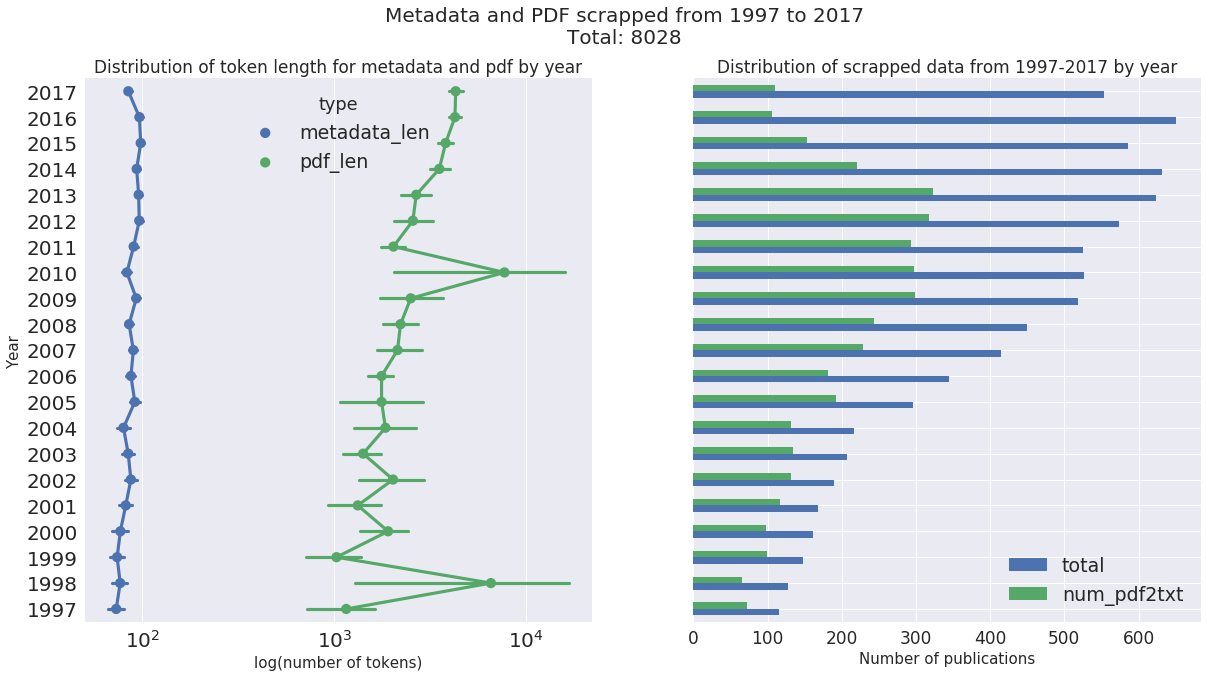

In [46]:
# by_year:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Metadata and PDF scrapped from 1997 to 2017\nTotal: 8028', fontsize=20)
ax1 = fig.add_subplot(121)
sns.set(font_scale=1.9) 
sns.pointplot(
    x='length',
    y='year',
    hue='type',
    hue_order=['metadata_len', 'pdf_len'],
    data=df_len,
    orient='h',
    ax=ax1,)
ax1.set_ylabel("Year", size=15)
ax1.set_xscale("log")
ax1.set_xlabel("log(number of tokens)", size=15)
ax1.set_title(
    'Distribution of token length for metadata and pdf by year',
    fontsize=17)

ax2 = fig.add_subplot(122, sharey=ax1)
ax2 = df_stats_by_yr[['total', 'num_pdf2txt']].plot.barh(ax=ax2, fontsize=17)
ax2.set_title(
    'Distribution of scrapped data from 1997-2017 by year',
    fontsize=17)
ax2.set_xlabel("Number of publications", size=15)
fig.savefig('./img/distribution_by_year1997-2017.pdf', format='pdf', bbox_inches='tight')


## Distribution of length of combined summary

In [ ]:
sns.factorplot(
    x='metadata_len',
    col='year',
    kind='count',
    col_wrap=10,
    col_order=sorted(map(int, df_combined.year.values)),
    data=df_combined)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fcf6ffc9d90> (for post_execute):


ValueError: Image size of 1440x510912 pixels is too large. It must be less than 2^16 in each direction.

In [106]:
# get a distribution of length of tokens:
toksLengthHist = {}
for row in pub_toks.iterrows():
    l = len(row[1]['toks'])
    if l not in list(toksLengthHist.keys()):
        toksLengthHist[l] = 1
    else:
        toksLengthHist[l] += 1

In [107]:
lengthHist = [(v, k) for (v, k) in list(toksLengthHist.items())]

In [111]:
lengths = list(zip(*lengthHist))[0]
freq = list(zip(*lengthHist))[1]

In [112]:
data = [list(lengths), list(freq)]
pd_data = pd.DataFrame(np.array(data).T, columns=['length', 'count'])

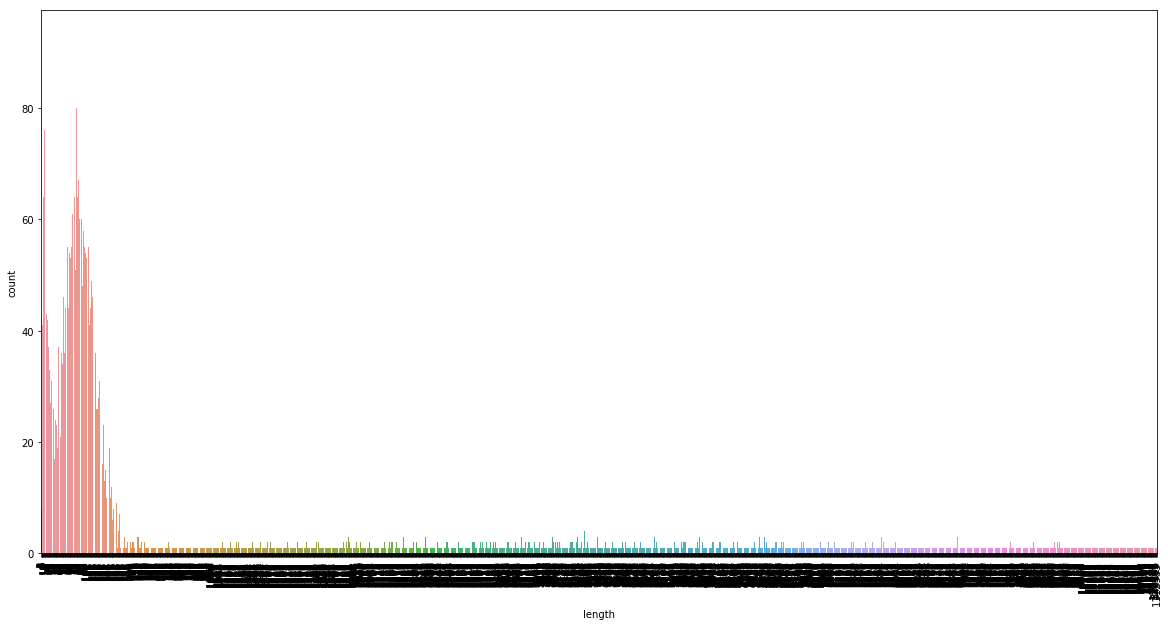

In [113]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
sns.barplot(x='length', y='count', data=pd_data, ax=ax)
plt.xticks(rotation=90)
# plt.savefig('./IMG/distribution_of_pub_length.pdf', format='pdf', bbox_inches='tight')

## Distribution of length of summary
TODO:
Create barchart that splits into each component: title, publication, abstract

In [71]:
pub_toks = pub_concise[['summary_toks']].copy()
pub_toks.head(2)

In [73]:
# inspect and check if there is any publication with no `summary_toks`
for row in pub_toks.iterrows():
    if len(row[1]['summary_toks']) == 0:
        print((row[0]))

In [74]:
# get a distribution of length of tokens:
toksLengthHist = {}
for row in pub_toks.iterrows():
    l = len(row[1]['summary_toks'])
    if l not in list(toksLengthHist.keys()):
        toksLengthHist[l] = 1
    else:
        toksLengthHist[l] += 1

In [75]:
lengthHist = [(v, k) for (v, k) in list(toksLengthHist.items())]

In [78]:
lengths = list(zip(*lengthHist))[0]
freq = list(zip(*lengthHist))[1]

In [79]:
import numpy as np

In [80]:
data = [list(lengths), list(freq)]
pd_data = pd.DataFrame(np.array(data).T, columns=['length', 'count'])

In [81]:
pd_data.head(5)

,length,count
0,96,75
1,91,90
2,69,73
3,122,39
4,113,66


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

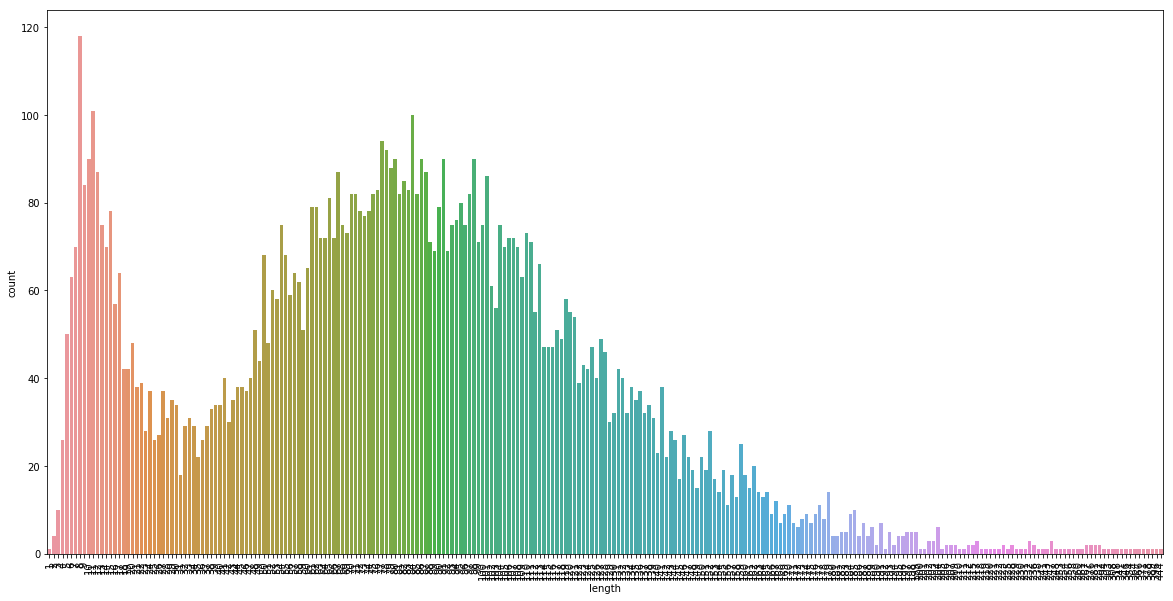

In [82]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
sns.barplot(x='length', y='count', data=pd_data, ax=ax)
plt.xticks(rotation=90)
# plt.savefig('./IMG/distribution_of_pub_length.pdf', format='pdf', bbox_inches='tight')

# Publications from `2012-2017`

In [5]:
gb = pub_all.groupby('year')

In [6]:
sixYears = ['2017', '2016', '2015', '2014', '2013', '2012']
pd_years = {}
print("Year:\tPub count")
for yr, group in gb:
    if yr in sixYears:
        pd_years[yr] = group
        print(("{}:\t{}".format(yr, len(group))))

Year:	Pub count
2012:	573
2013:	623
2014:	629
2015:	583
2016:	645
2017:	521


In [7]:
pub_combined_yrs = pd.concat(list(pd_years.values()))

In [44]:
# Save the 2012-2017:
pub_combined_yrs.to_pickle('../data/pub_toks_w_pdf2txt_2012-17.pkl')

### Check how many of these publications doesnt have pdf2txt:

In [37]:
print(('{}\t{}\t{}'.format('Year:', 'Pub count', '#pdf2txt')))
for yr, df in list(pd_years.items()):
    _pdf2txts = df.pdf2txt.values
    count = len([len(a.strip()) for a in _pdf2txts if len(a) > 0])
    print(('{}\t{}\t\t{}'.format(yr, len(df), count)))

Year:	Pub count	#pdf2txt
2015	583		236
2014	629		235
2017	521		253
2016	645		313
2013	623		169
2012	573		143


In [17]:
len(pub_combined_yrs)

3574

Total of <b>1,349</b> publications, out of 3574, from 2012-2017 have pdf that can be converted to txt

In [38]:
pdf2txts = pub_combined_yrs.pdf2txt.values

In [39]:
num = 0
for t in pdf2txts:
    if len(t.strip()) == 0:
        num += 1

2225


In [40]:
lenhist = [len(t.strip()) for t in pdf2txts]

In [41]:
max(lenhist)

998916

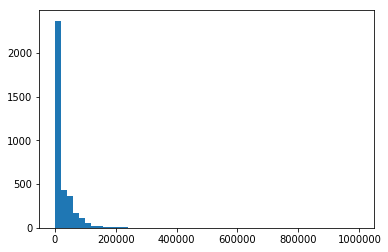

In [43]:
plt.hist(lenhist, 50)